## <font color='black'>Análise Exploratória de Dados de E-Commerce</font>

Neste projeto de estudo, foi realizado a análise exploratória dos dados logísticos de um e-commerce, onde os dados foram explorados a fim de correlacioná-los à variável target que, no nosso caso, é se o produto foi ou não entregue no prazo!

In [1]:
# Importando os pacotes necessários para o trabalho

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Aqui foi feito uma pré definição de alguns parâmetros dos gráficos que serão plotados 

from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### Carregando e explorando o Dataset

In [3]:
# Carregando os dados
df = pd.read_csv('dados/dataset.csv')

In [4]:
# Verificando a quantidade de linhas e colunas
df.shape

(11000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Visualizando uma amostra dos dados:

In [6]:
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [7]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
6914,6915,A,Navio,5,2,226,5,media,M,5,1659,0
8536,8537,C,Navio,6,1,222,8,baixa,M,2,4914,0
3746,3747,A,Navio,2,2,180,2,alta,M,1,4407,0
5973,5974,B,Navio,4,1,220,3,media,M,1,5159,1
8276,8277,A,Navio,4,2,245,3,baixa,F,5,5226,0


In [8]:
df.tail(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


### Separação das Variáveis Categóricas e Numéricas

In [9]:
# Verificando os nomes das colunas do dataset
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [10]:
# Exibindo os tipos das variáveis
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [11]:
# Lista de colunas categóricas
cats = ['corredor_armazem',
        'modo_envio', 
        'prioridade_produto', 
        'genero']

In [12]:
# Lista de colunas numéricas
nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'custo_produto', 
        'compras_anteriores', 
        'desconto', 
        'peso_gramas']

In [13]:
target = ['entregue_no_prazo']

### Explorando as Variáveis Numéricas

In [14]:
# Resumo das variáveis numéricas
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


<AxesSubplot:>

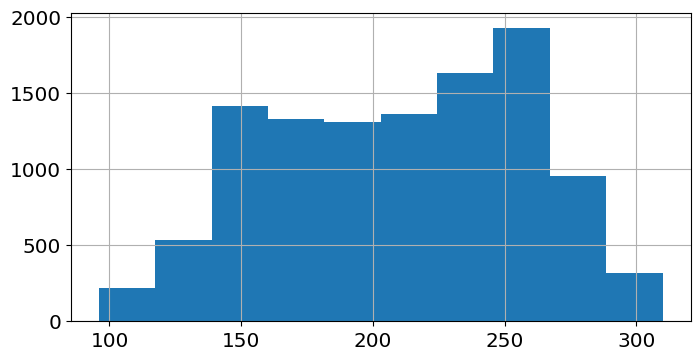

In [15]:
df['custo_produto'].hist()

<AxesSubplot:>

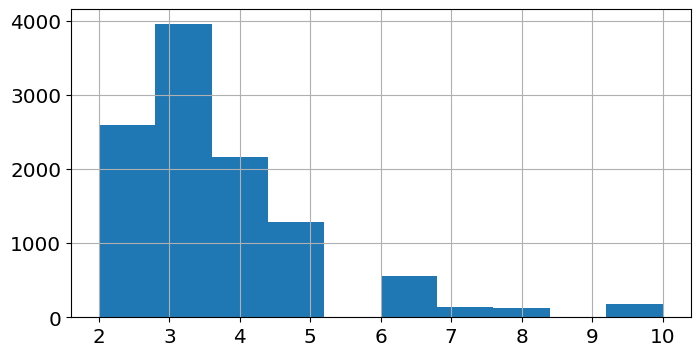

In [16]:
df['compras_anteriores'].hist()

<AxesSubplot:>

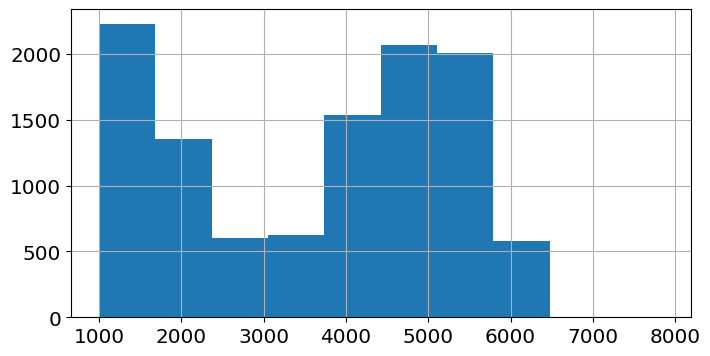

In [17]:
df['peso_gramas'].hist()

### Explorando as Variáveis Categóricas

In [18]:
# Resumo das variáveis categóricas
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [19]:
# Realizando uma contagem por categoria de cada variável categórica
for colunas in cats:
    print(f'''Contagem de Registros Por Categoria da Variável {colunas}:''')
    print(df[colunas].value_counts())
    print()

Contagem de Registros Por Categoria da Variável corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Contagem de Registros Por Categoria da Variável modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Contagem de Registros Por Categoria da Variável prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Contagem de Registros Por Categoria da Variável genero:
F    5546
M    5454
Name: genero, dtype: int64



#### Com os dados acima, podemos constatar quais os valores com maior recorrência em cada coluna categórica, por exemplo temos:
- Corredor F é onde mais possui registros;
- O maior número de entregas se dá por navio;
- Poucos produtos são de prioridade alta;
- A proporção de clientes do sexo Masculino e Feminino é praticamente a mesma.

### Análise Univariada - Box Plots

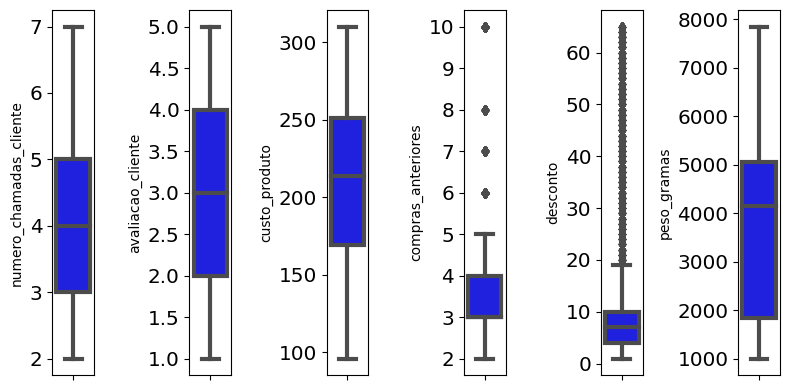

In [20]:
# Plotagem dos Box Plots.    
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

###  Com o Box Plot, podemos extrair de forma gráfica uma série de informações das variáveis, tais como:
- Média;
- 1º quartil;
- 2º quartil (mediana);
- 3º quartil;
- Valores mínimo e máximo;
- Outliers;
- Entender a dimensão da variância dos dados, isso pode ser verificado através do tamanho do "corpo" do gráfico.

### Análise Univariada - Count Plot 

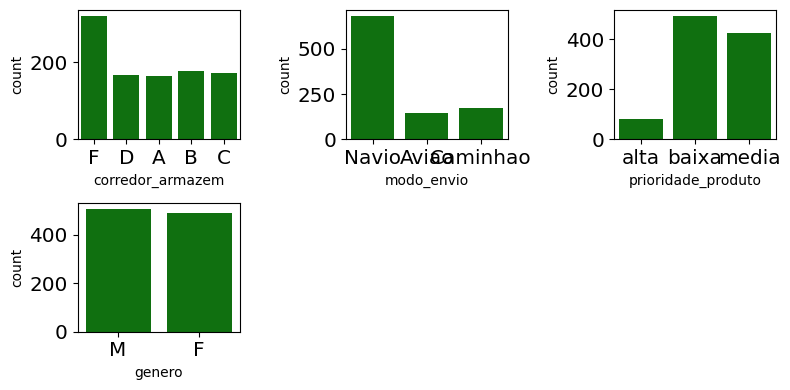

In [21]:
# Gráfico de barras simples, onde nos mostra graficamente as contagens dos valores de cada variável categórica.

df_sample = df.sample(1000, random_state = 42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'green', orient = 'v')
    plt.tight_layout()

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='count'>

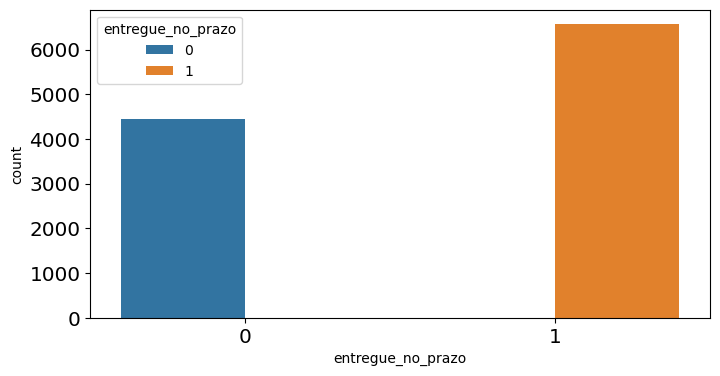

In [22]:
# Count Plot da variável target (sendo 0 para "não" e 1 para "sim")
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo')

### Correlação entre as variáveis

#### Uma breve explicação sobre os valores de correlação entre as variáveis:
- Os valores variam entre -1 e 1;
- -1 indica uma forte correlação negativa, ou seja, o aumento do valor de uma variável implica fortemente na diminuição do valor da outra;
- 1 indica uma forte correlação positiva, ou seja, o aumento do valor de uma variável implica fortemente no aumento do valor da outra;
- 0 nos indica que não há nenhuma correlação entre as variáveis em questão.

In [23]:
# Criando a tabela de correlação

corr_df = df[nums].corr()

In [24]:
corr_df

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


<AxesSubplot:>

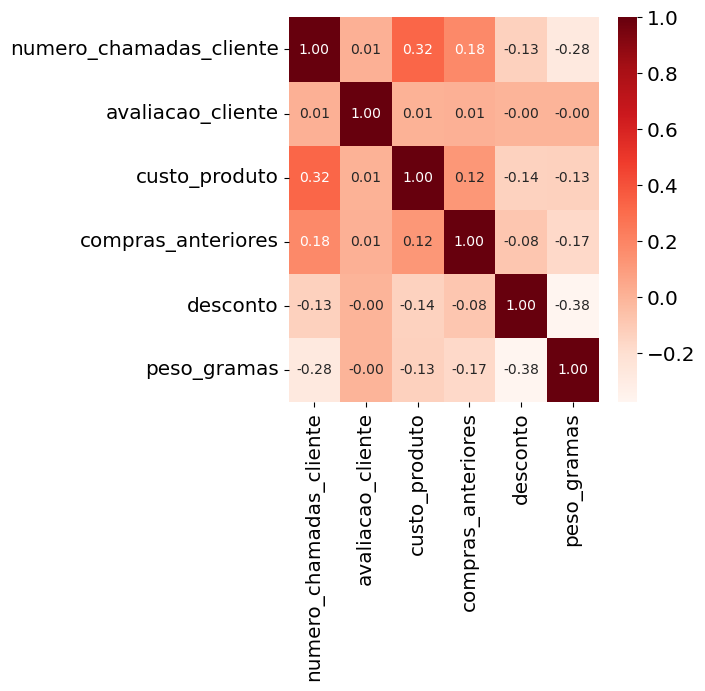

In [25]:
# Aqui nada mais é do que a tabela acima representada de forma gráfica, sendo mais fácil a visualização das correlações.
plt.figure(figsize = (5, 5))
sns.heatmap(corr_df, cmap = 'Reds', annot = True, fmt = '.2f')

Algumas informações que podem ser extraídas a partir do *mapa de correlação* acima são:

* Há uma correlação positiva entre `numero_chamadas_cliente` e `custo_produto`.
* Há uma correlação positiva entre `numero_chamadas_cliente` e `compras_anteriores`.
* Há uma correlação negativa entre `desconto` e `peso_gramas`.
* E há uma correlação fraca entre as demais variáveis.


### Colunas Categóricas x Variável Target

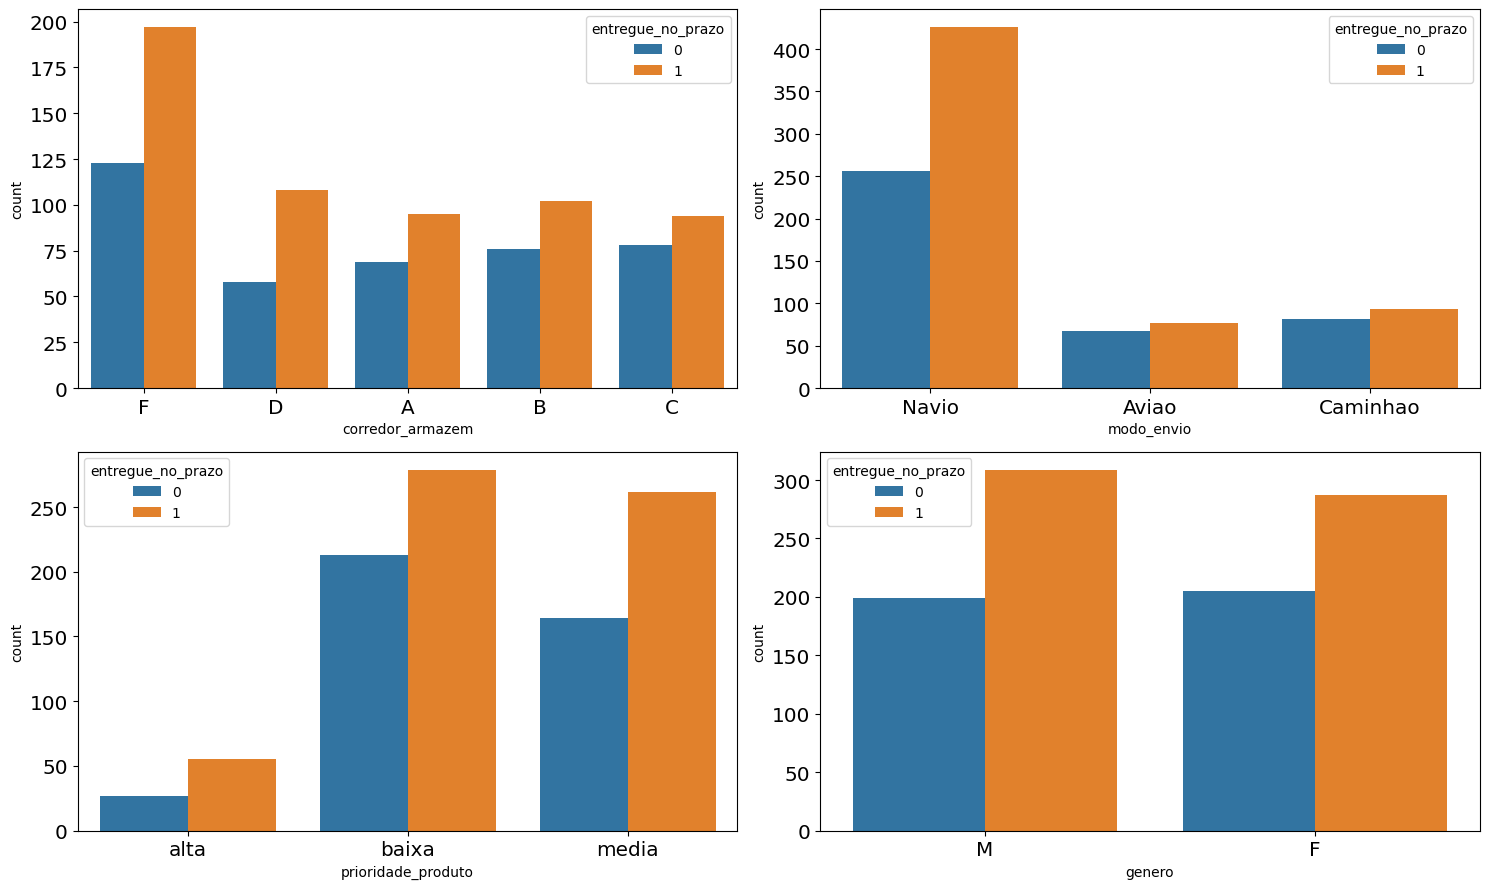

In [26]:
plt.figure(figsize = (15, 9))
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.countplot(data = df_sample, x = features[i], hue = 'entregue_no_prazo')
    plt.tight_layout()

Algumas análises extraídas das representações acima:

* Envio por navio tende a apresentar atraso na entrega.
* Em prioridade_produto as categorias baixa e média tendem a apresentar atrasos na entrega.
* Em corredor_armazem produtos do corredor F tendem a apresentar atraso na entrega.
* Produtos comprados por mulheres tem um volume ligeiramente menor de entregas feitas no prazo.

## Agora vamos responder à algumas perguntas de negócio:

#### 1 - Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?

O passo-a-passo realizado na questão 1, foi replicado nos exercícios 2 e 3, sendo alterado somente o parâmetro a ser avaliado, que foram:
Questão 1 - prioridade do produto;
Questão 2 - modo de envio;
Questão 3 - corredor de armazenamento.

In [27]:
# Tabela com a quantidade de itens entregues no prazo e não entregues no prazo


df_group1 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group1

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [28]:
# Agrupando os dados por entrega no prazo e por prioridade do produto e fazendo suas contagens

df_group2 = df.groupby(['entregue_no_prazo','prioridade_produto']).agg({'ID' : 'nunique'}).reset_index()
df_group2

,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [29]:
# Unindo as tabelas df_group1 e df_group2

df_group3 = df_group2.merge(df_group1, on = 'entregue_no_prazo')
df_group3

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,4437
1,0,baixa,2158,4437
2,0,media,1947,4437
3,1,alta,616,6563
4,1,baixa,3140,6563
5,1,media,2807,6563


In [30]:
# Tabela com a quantidade de itens de acordo com sua prioridade

df_group4 = df.groupby('prioridade_produto').agg({'ID' : 'nunique'}).reset_index() 
df_group4

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [31]:
# Unindo as tabelas df_group4 e df_group2

df_group5 = df_group2.merge(df_group4, on = 'prioridade_produto')
df_group5

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,1,alta,616,948
2,0,baixa,2158,5298
3,1,baixa,3140,5298
4,0,media,1947,4754
5,1,media,2807,4754


Dando uma melhorada nas tabelas df_group3 e df_group5, alterando os nomes das colunas e colocando percentuais para uma melhor visualização

In [33]:
df_group3['Percentual(%)'] = df_group3['ID_x'] / df_group3['ID_y'] * 100
df_group3.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group3

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,4437,7.482533
1,0,baixa,2158,4437,48.636466
2,0,media,1947,4437,43.881001
3,1,alta,616,6563,9.385952
4,1,baixa,3140,6563,47.843974
5,1,media,2807,6563,42.770075


In [32]:
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100
df_group5.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group5

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,948,35.021097
1,1,alta,616,948,64.978903
2,0,baixa,2158,5298,40.732352
3,1,baixa,3140,5298,59.267648
4,0,media,1947,4754,40.954985
5,1,media,2807,4754,59.045015


A coluna de percentual se faz importante pois, veremos ao plotar os gráficos que somente com os valores absolutos podemos ter um falso diagnóstico sobre nossa análise.

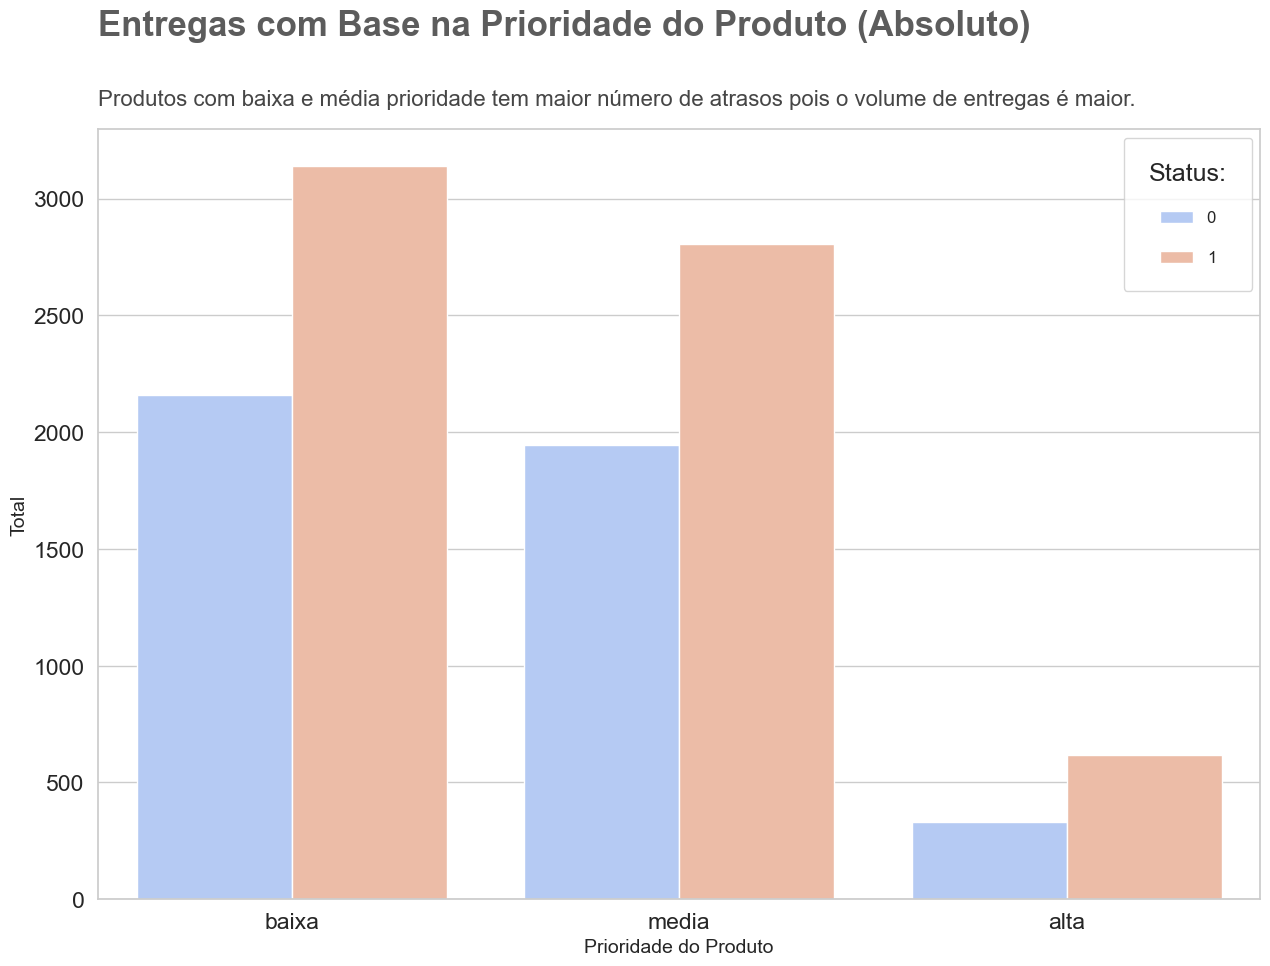

In [36]:
# Gráfico 1 - Análise em valores absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'prioridade_produto', 
                      hue = 'entregue_no_prazo',
                      palette = 'coolwarm')
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Prioridade do Produto", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 3700, 
           s = "Entregas com Base na Prioridade do Produto (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 3400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16, 
           alpha = .85);

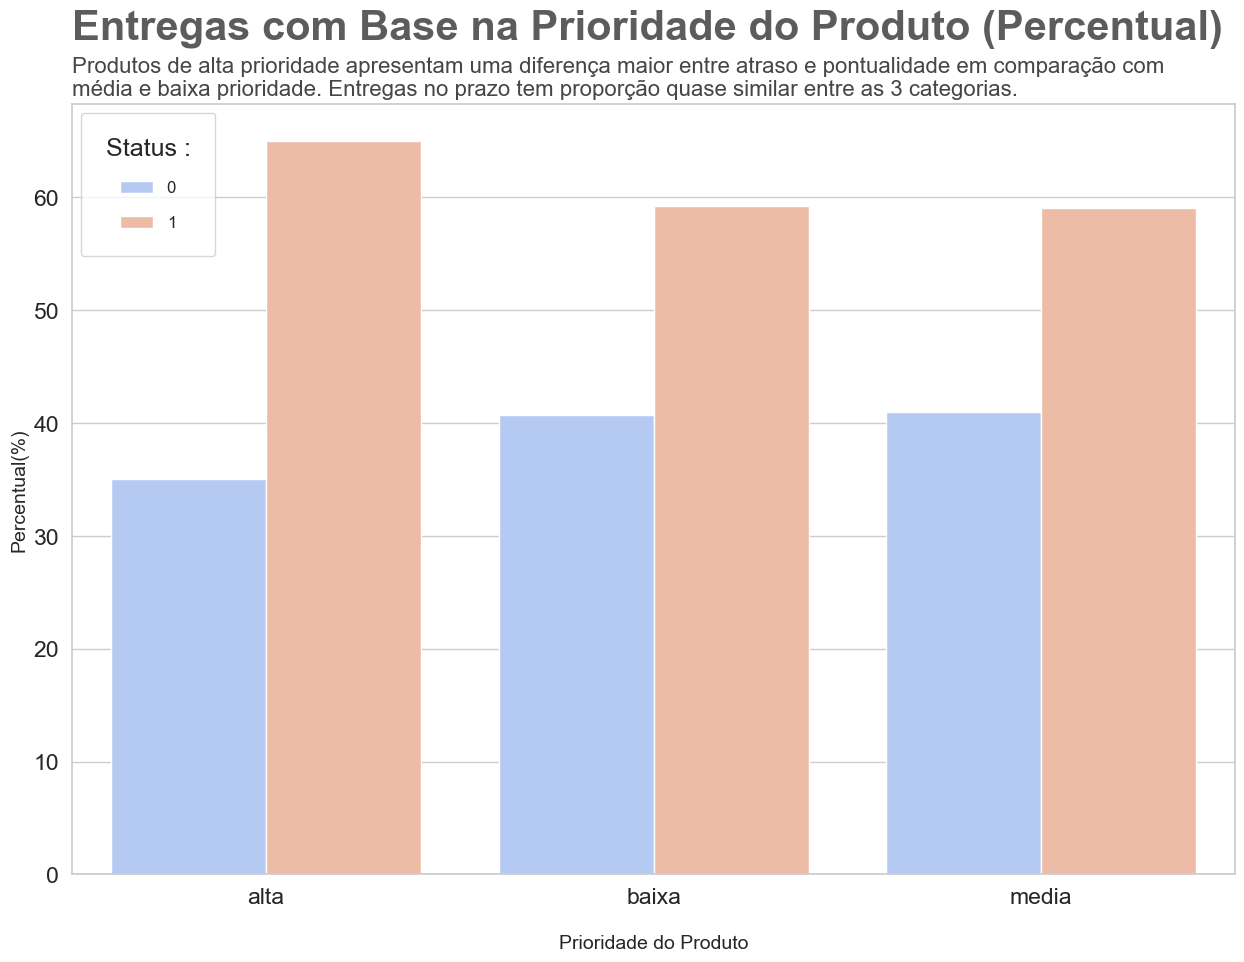

In [38]:
# Gráfico 2 - Análise em valores percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Prioridade do Produto', 
                    y = 'Percentual(%)', 
                    data = df_group5, 
                    hue = 'Status de Entrega no Prazo',
                    palette = 'coolwarm')
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status :')
chart.text(x = -0.5, 
           y = 74, 
           s = "Entregas com Base na Prioridade do Produto (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 69,
           s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com \nmédia e baixa prioridade. Entregas no prazo tem proporção quase similar entre as 3 categorias.',
           fontsize = 16, 
           alpha = .85);

#### 2 - Os atrasos nas entregas estão igualmente distribuídos pelos modos de envio?

In [39]:
df_group6 = df.groupby(['entregue_no_prazo', 'modo_envio']).agg({'ID' : 'nunique'}).reset_index()
df_group6

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [40]:
df_group7 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group7

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [43]:
df_group8 = df_group6.merge(df_group7, on = 'entregue_no_prazo')
df_group8

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,4437
1,0,Caminhao,725,4437
2,0,Navio,3004,4437
3,1,Aviao,1069,6563
4,1,Caminhao,1035,6563
5,1,Navio,4459,6563


In [44]:
df_group9 = df.groupby('modo_envio').agg({'ID' : 'nunique'}).reset_index() 
df_group9

,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [46]:
df_group10 = df_group6.merge(df_group9, on = 'modo_envio')
df_group10

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,1,Aviao,1069,1777
2,0,Caminhao,725,1760
3,1,Caminhao,1035,1760
4,0,Navio,3004,7463
5,1,Navio,4459,7463


In [48]:
df_group10['Percentual(%)'] = df_group10['ID_x'] / df_group10['ID_y'] * 100
df_group10.columns = ['Status de Entrega no Prazo', 
                     'Modo de Envio', 
                     'Total Por Categoria', 
                     'Total Geral', 
                     'Percentual(%)']
df_group10

,Status de Entrega no Prazo,Modo de Envio,Total Por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.842431
1,1,Aviao,1069,1777,60.157569
2,0,Caminhao,725,1760,41.193182
3,1,Caminhao,1035,1760,58.806818
4,0,Navio,3004,7463,40.251909
5,1,Navio,4459,7463,59.748091


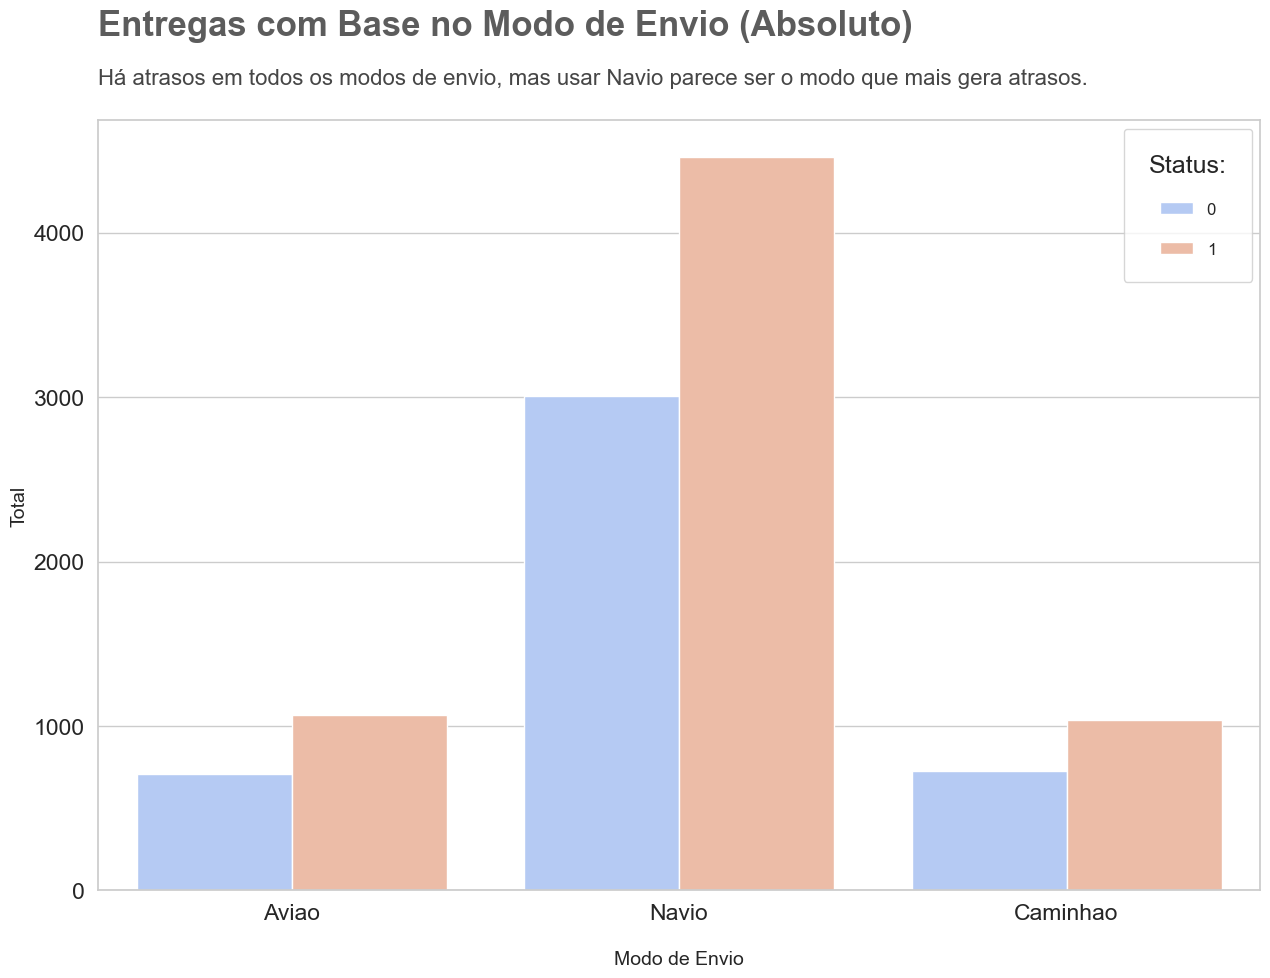

In [49]:
# Gráfico 1 - Análise em Valores Absolutos

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.countplot(data = df, 
                      x = 'modo_envio', 
                      hue = 'entregue_no_prazo',
                      palette = 'coolwarm')

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)

# Legenda
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Adicionado Título 
chart.text(x = -0.5, 
           y = 5200, 
           s = "Entregas com Base no Modo de Envio (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Adicionado Sub-Título
chart.text(x = -0.5, 
           y = 4900,
           s = 'Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.',
           fontsize = 16, 
           alpha = .85);

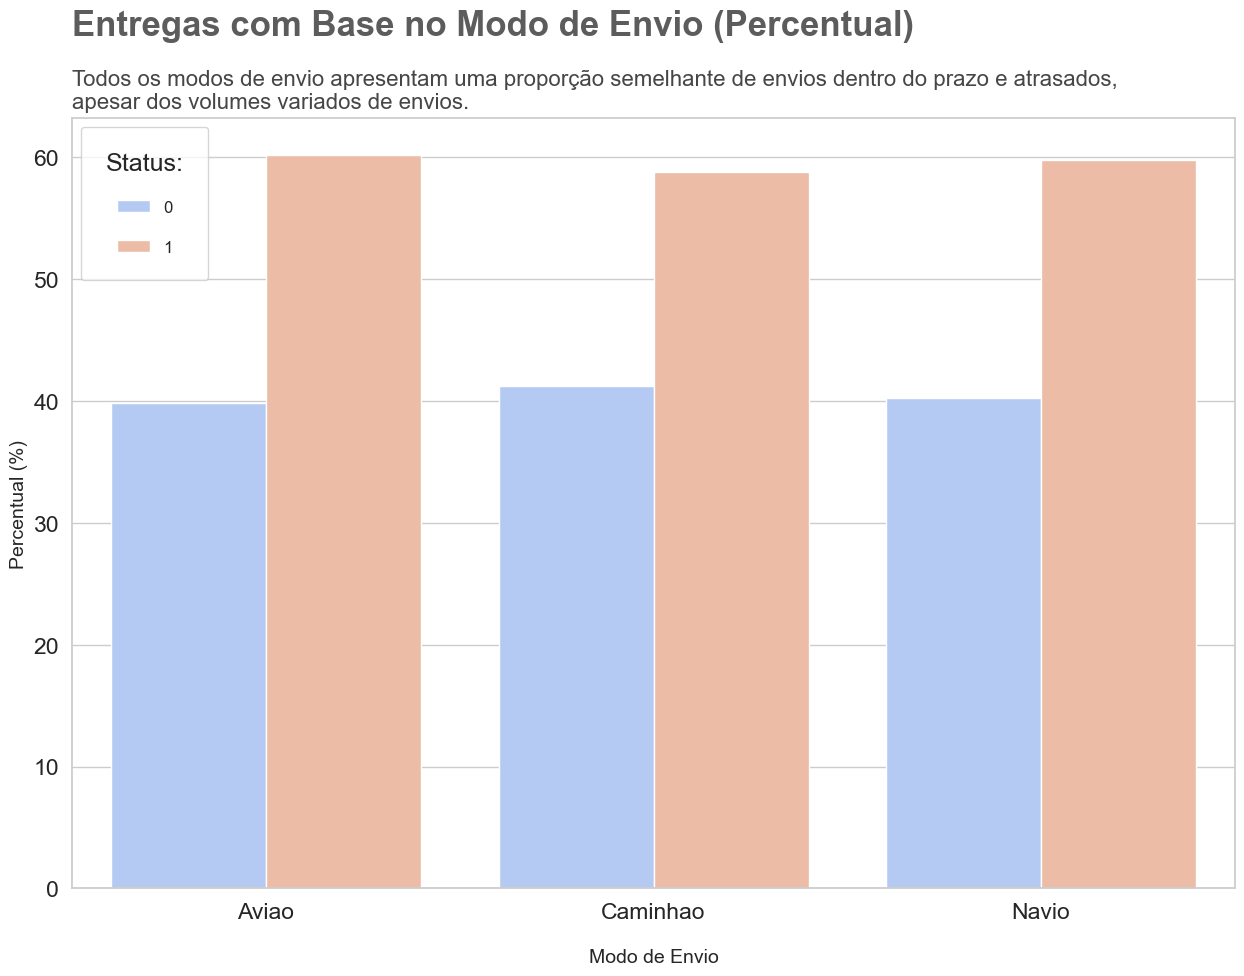

In [50]:
# Gráfico 2 - Análise em Valores Percentuais

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.barplot(x = 'Modo de Envio', 
                    y = 'Percentual(%)', 
                    data = df_group10, 
                    hue = 'Status de Entrega no Prazo',
                    palette = 'coolwarm')

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "Entregas com Base no Modo de Envio (Percentual)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasados, \napesar dos volumes variados de envios.',
           fontsize = 16, 
           alpha = .85);

#### 3 - Quais corredores armazenam produtos com maior proporção de entregas com atraso?

In [51]:
df_group11 = df.groupby(['entregue_no_prazo','corredor_armazem']).agg({'ID' : 'nunique'}).reset_index()
df_group11

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [52]:
df_group12 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group12

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [53]:
df_group13 = df_group11.merge(df_group12, on = 'entregue_no_prazo')
df_group13

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,4437
1,0,B,729,4437
2,0,C,740,4437
3,0,D,738,4437
4,0,F,1472,4437
5,1,A,1075,6563
6,1,B,1104,6563
7,1,C,1094,6563
8,1,D,1096,6563
9,1,F,2194,6563


In [54]:
df_group13['Percentual(%)'] = df_group13['ID_x'] / df_group13['ID_y'] * 100
df_group13.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group13

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,4437,17.083615
1,0,B,729,4437,16.430020
2,0,C,740,4437,16.677936
3,0,D,738,4437,16.632860
4,0,F,1472,4437,33.175569
5,1,A,1075,6563,16.379704
6,1,B,1104,6563,16.821575
7,1,C,1094,6563,16.669206
8,1,D,1096,6563,16.699680
9,1,F,2194,6563,33.429834


In [55]:
df_group14 = df.groupby('corredor_armazem').agg({'ID' : 'nunique'}).reset_index() 
df_group14

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [56]:
df_group15 = df_group11.merge(df_group14, on = 'corredor_armazem')
df_group15

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,740,1834
5,1,C,1094,1834
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [57]:
df_group15['Percentual(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group15

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.352973
1,1,A,1075,1833,58.647027
2,0,B,729,1833,39.770867
3,1,B,1104,1833,60.229133
4,0,C,740,1834,40.348964
5,1,C,1094,1834,59.651036
6,0,D,738,1834,40.239913
7,1,D,1096,1834,59.760087
8,0,F,1472,3666,40.152755
9,1,F,2194,3666,59.847245


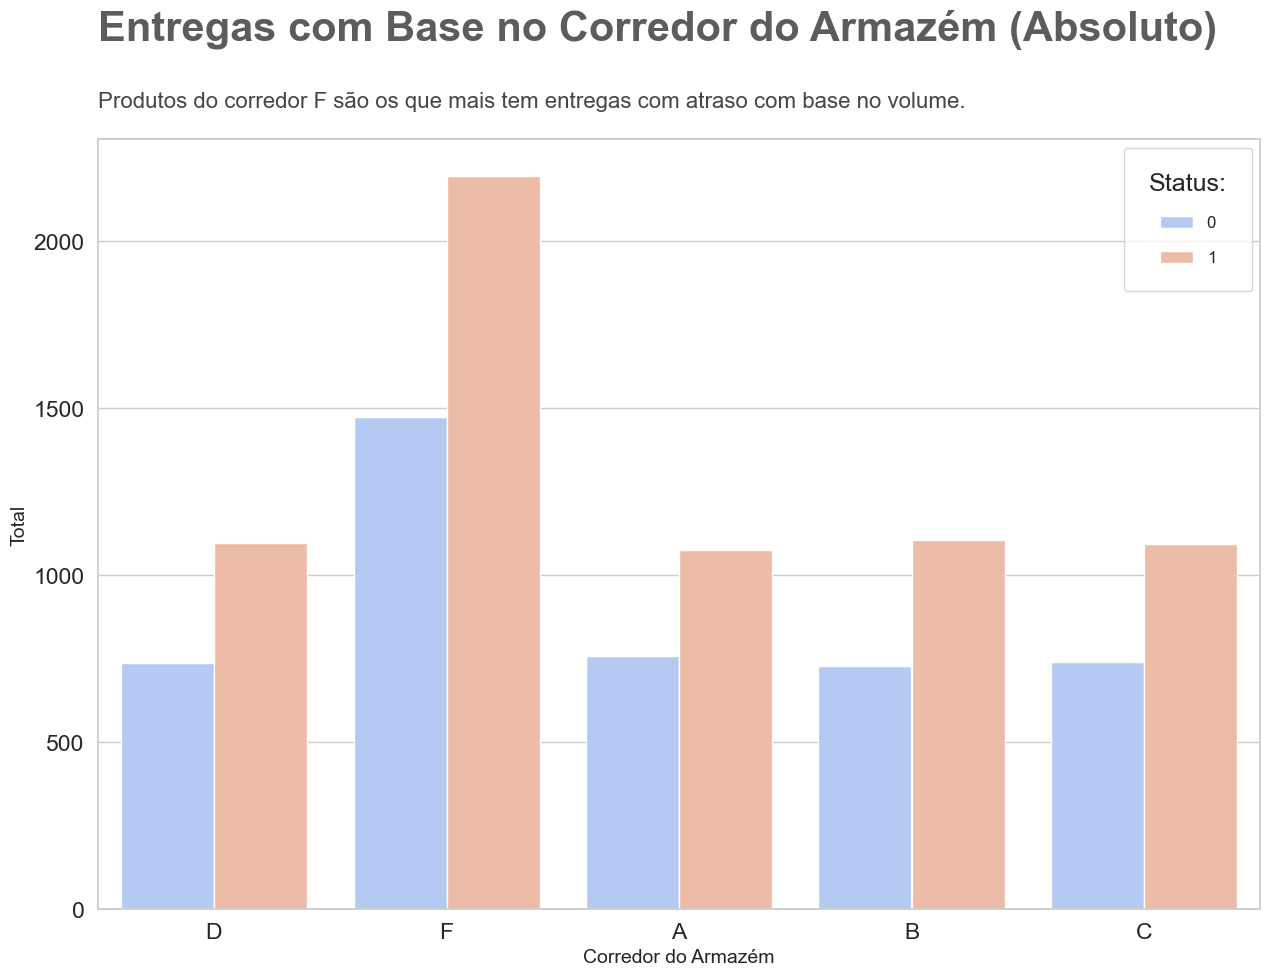

In [58]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'corredor_armazem', 
                      hue = 'entregue_no_prazo', 
                      palette = 'coolwarm')
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 2600, 
           s = "Entregas com Base no Corredor do Armazém (Absoluto)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 2400,
           s = 'Produtos do corredor F são os que mais tem entregas com atraso com base no volume.',
           fontsize = 16, 
           alpha = .85);

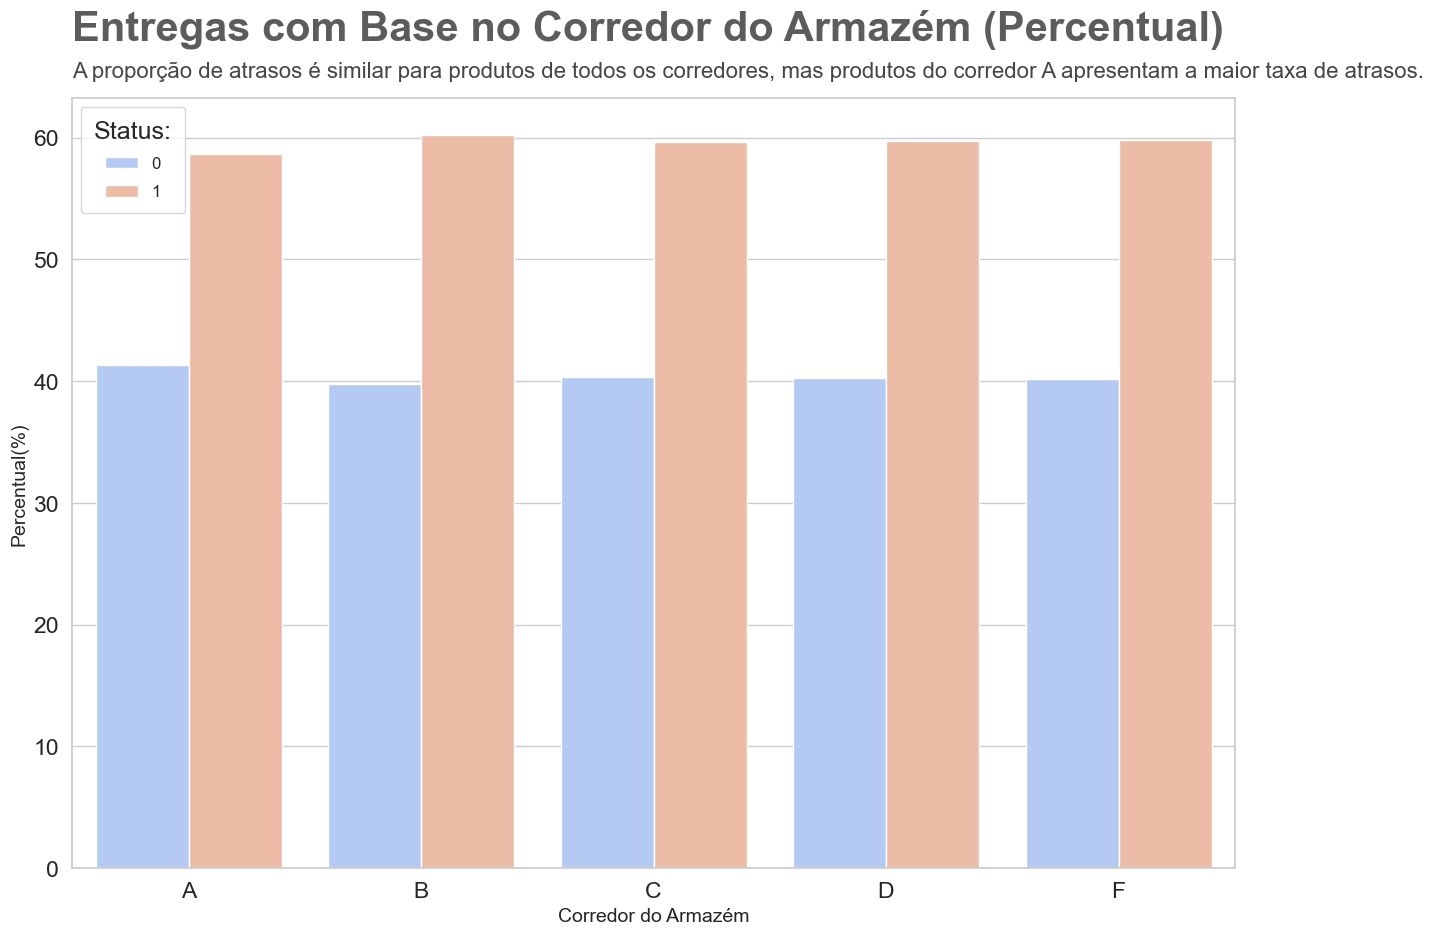

In [60]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Corredor do Armazem', 
                    y = 'Percentual(%)', 
                    data = df_group15, 
                    hue = 'Status de Entrega no Prazo',
                    palette = 'coolwarm')
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 68, 
           s = "Entregas com Base no Corredor do Armazém (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 65,
           s = 'A proporção de atrasos é similar para produtos de todos os corredores, mas produtos do corredor A apresentam a maior taxa de atrasos.',
           fontsize = 16, 
           alpha = .85);